<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import os 


np.random.seed(42)

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


In [0]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [0]:

try:
  from sklearn.datasets import fetch_openml
  
  mnist = fetch_openml('mnist_784',version=1,cache=True)
  mnist.target = mnist.target.astype(np.int8)
  sort_by_target(mnist)
  
except ImportError:
  from sklearn.datasets import fetch_mldata
  mnist = fetch_mldata('MNIST original')
  
mnist["data"],mnist["target"]





(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [0]:
mnist.data.shape

(70000, 784)

In [0]:
X,y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [0]:
y.shape

(70000,)

In [0]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [0]:
def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image,cmap=mpl.cm.binary,
            interpolation="nearest")
  plt.axis("off")

In [0]:
def plot_digits(instances,images_per_row=10,**options):
  size = 28
  images_per_row = min(len(instances),images_per_row)
  images = [instance.reshape(size,size) for instance in instances]
  n_rows = (len(instances)-1) // images_per_row + 1 
  row_images = [] 
  n_empty = n_rows * images_per_row - len(instances)
  images.append(np.zeros((size,size*n_empty)))
  for row in range(n_rows):
    rimages = images[row*images_per_row:(row+1)*images_per_row]
    row_images.append(np.concatenate(rimages,axis=1))
    
  image = np.concatenate(row_images,axis=0)
  plt.imshow(image,cmap=mpl.cm.binary,**options)
  plt.axis("off")

Saving figure more_digits_plot


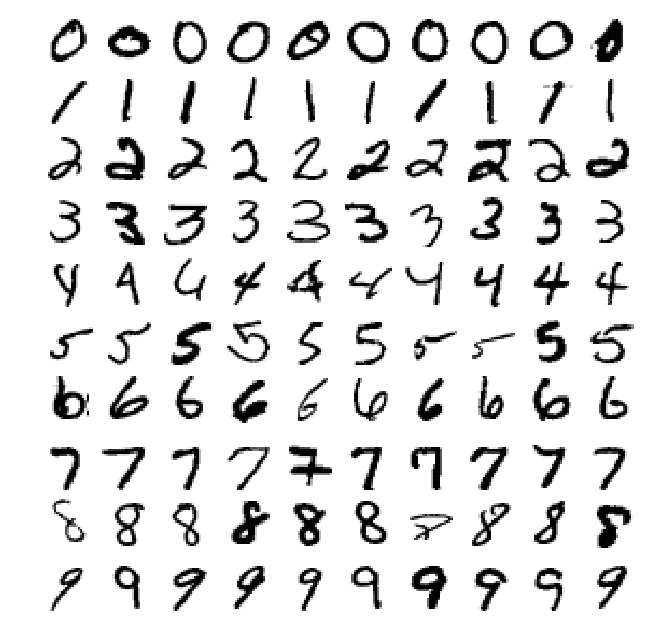

In [0]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600],X[13000:30600:600],X[30600:60000:590]]
plot_digits(example_images,images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [0]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [0]:
import numpy as np 

shuffle_index = np.random.permutation(60000)


X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]


In [0]:
y_train_5 = (y_train==5)
Y_test_5 = (y_test==5)

In [0]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5,tol = -np.infty,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
sgd_clf.predict([some_digit])

array([ True])

In [0]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.9502 , 0.96565, 0.96495])

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

skfolds = StratifiedKFold(n_splits=3,random_state=42)

for train_index, test_index in skfolds.split(X_train,y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = (y_train_5[train_index])
  X_test_fold = X_train[test_index]
  y_test_fold = (y_train_5[test_index])
  
  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.9502
0.96565
0.96495


In [0]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self,X,y=None):
    pass
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)

In [0]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

In [0]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_pred)

0.7687135020350381

In [0]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7846820809248555

In [0]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores
threshold = 0
y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

Saving figure precision_recall_vs_threshold_plot


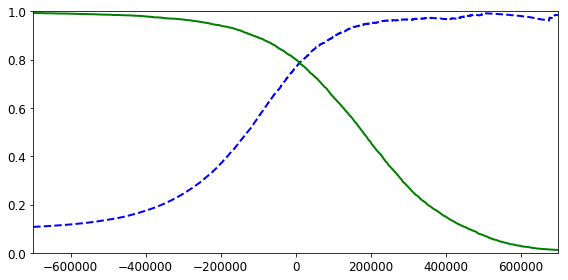

In [0]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
  plt.plot(thresholds,precisions[:-1],"b--",label="Precision",linewidth=2)
  plt.plot(thresholds,recalls[:-1],"g-",label="Recall",linewidth=2)
  plt.ylim([0,1])
  
plt.figure(figsize=(8,4))

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

plt.xlim([-700000,700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [0]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

Saving figure roc_curve_plot


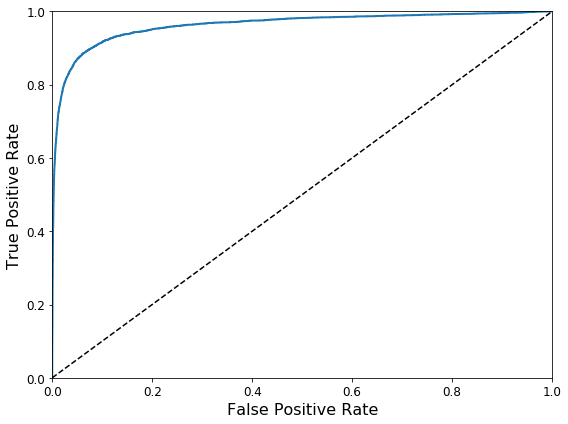

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9624496555967156

In [0]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])








array([5], dtype=int8)

In [0]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [0]:
np.argmax(some_digit_scores)

5

In [0]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [0]:
sgd_clf.classes_[5]

5

In [0]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5,tol=-np.infty,random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])


array([5], dtype=int8)